<a href="https://colab.research.google.com/github/AIGeekProgrammer/MiscellaneousAI/blob/main/Logistic%20Regression/Logistic_Regression_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook: Logistic Regression on a simple 2D dataset using PyTorch<br>
Author: Szymon Manduk<br>
Created: 12 Feb 2022<br>
Last modyfication: 12 Feb 2022<br>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
# Generate 2 blobs using sklearn, preserving random state
X, y = datasets.make_blobs(500, centers=[[-1.4,1.4], [1.4,-1.4]], random_state=1)

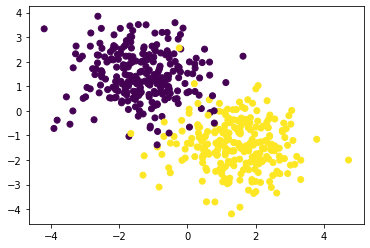

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)

In [4]:
# splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y)

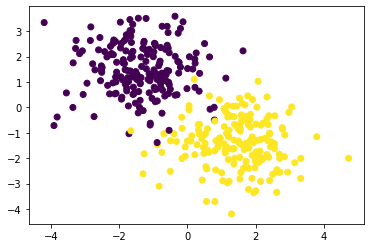

In [5]:
# let's see training dataset
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

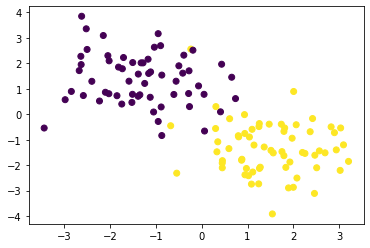

In [6]:
# let's see test dataset
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

In [7]:
# converting into tensor
train_inputs = torch.from_numpy(X_train)
train_labels = torch.from_numpy(y_train)
test_inputs = torch.from_numpy(X_test)
test_labels = torch.from_numpy(y_test)
print(f'Train dataset: {len(train_inputs)}. Test dataset: {len(test_inputs)}')

Train dataset: 375. Test dataset: 125


In [8]:
# To implement logistic regression we use linear model with 
# the logistic sigmoid function at the end
from torch.nn.modules.linear import Linear

class LogisticRegression(torch.nn.Module):
  def __init__(self, n_inputs, n_outputs):
    super().__init__()
    self.linear = Linear(n_inputs, n_outputs)
  def forward(self, x):
    return torch.sigmoid(self.linear(x))

In [9]:
# hyperparameters
epochs = 401
learning_rate = 0.001
n_inputs = 2 
n_outputs = 1 

In [10]:
model = LogisticRegression(n_inputs, n_outputs)

In [11]:
# inputs we generated from numpy arrays are floats. We need convert our Double
# model into float one
model = model.float()

In [12]:
# create loss function and optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
# training loop
for epoch in range(epochs):
  for x, y in zip(train_inputs, train_labels):
    y_pred = model.forward(x.float())
    loss = criterion(y_pred, y.view(1).float())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  if epoch % 50 == 0:
    print(f'Epoch #:{epoch} with loss={loss}')

Epoch #:0 with loss=0.6572683453559875
Epoch #:50 with loss=0.0050187669694423676
Epoch #:100 with loss=0.00132929184474051
Epoch #:150 with loss=0.0006124463980086148
Epoch #:200 with loss=0.00035989799653179944
Epoch #:250 with loss=0.00024267994740512222
Epoch #:300 with loss=0.0001787106884876266
Epoch #:350 with loss=0.00013996149937156588
Epoch #:400 with loss=0.00011456669017206877


In [14]:
# calculate accuracy for test dataset
n_cases = len(test_labels)
hits = 0
idx = 0
for x, y in zip( test_inputs, test_labels):
  y_pred = model.forward(x.float())
  if torch.round(y_pred) == y:
    hits += 1
  else:
    # datapoints with inaccurate predictions are marked with -1
    # for them to be visible on a plot
    test_labels[idx] = -1  
  idx += 1
accuracy = hits / n_cases * 100
print(f'Test set accuracy:{accuracy:.2f}')

Test set accuracy:96.00


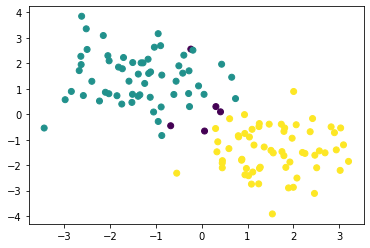

In [15]:
# print test dataset, with wrong predictions printed with the third color
plt.scatter(test_inputs[:,0], test_inputs[:,1], c=test_labels)